In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
df0 = pd.read_pickle('Model_review.pkl')

In [3]:
model = df0.copy()

In [4]:
# Shape of data set
print(str(len(model))+' rows.\n'+str(len(model.columns))+' columns.')
print(str(len(model.columns)-1)+' features.')

4018 rows.
60 columns.
59 features.


In [5]:
# null check
model.isnull().sum().sum()

0

Text(0.5, 1.0, 'Distribution of monthly availability')

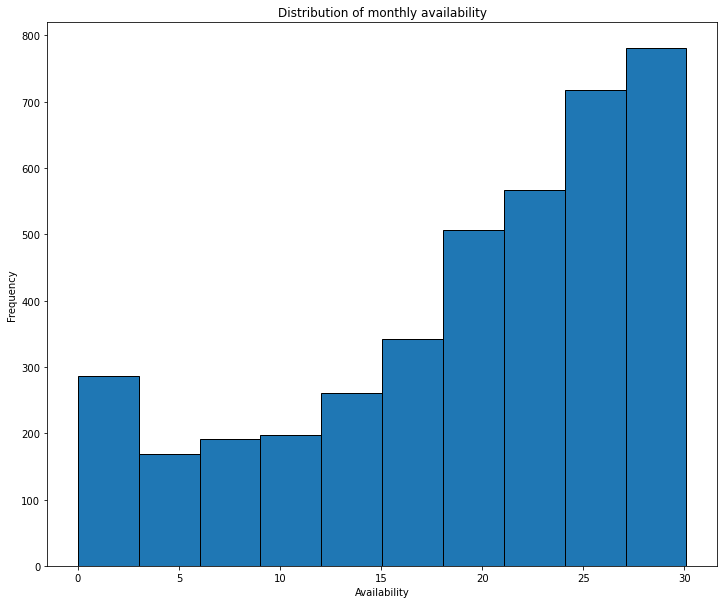

In [6]:
# Plot price
import matplotlib.pyplot as plt
plt.figure(figsize = (12,10))
model['availability'].plot(kind = 'hist', bins = 10, edgecolor = 'black')
plt.xlabel('Availability')
plt.title('Distribution of monthly availability')

In [7]:
# PRE PROCESSING
X = model.drop(['availability'],axis = 1)
y = model['availability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

MSE: 69.76881433667644
RMSE: 8.352772853171361
RRMSE: 0.4355189715393638
MAE: 6.750522544938607
RMAE: 0.35197660559016714
EV: 0.04853274638485694
R2: 0.04847097467303296


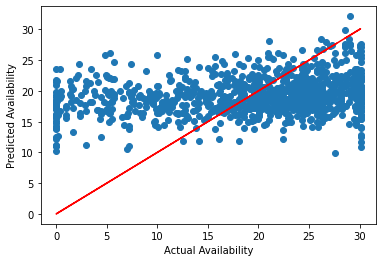

In [8]:
# REGRESSION MODELING #
lm = LinearRegression()
lm.fit(X_train,y_train)

# PREDICTIONS
plm = lm.predict(X_test)
plt.scatter(y_test,plm)
plt.plot(y_test,y_test,"r")
plt.xlabel('Actual Availability')
plt.ylabel('Predicted Availability')

# EVALUATE THE MODEL
print("MSE:",metrics.mean_squared_error (y_test,plm))
print("RMSE:", np.sqrt(metrics.mean_squared_error (y_test,plm)))
print("RRMSE:",np.sqrt(metrics.mean_squared_error (y_test,plm))/y_test.mean())
print("MAE:", metrics.mean_absolute_error (y_test, plm))
print("RMAE:", metrics.mean_absolute_error (y_test, plm)/y_test.mean())
print("EV:", metrics.explained_variance_score(y_test,plm))
print("R2:", metrics.r2_score(y_test,plm))

MSE: 56.12440647137396
RMSE: 7.491622419167557
RRMSE: 0.3906180317016887
MAE: 6.010788915422885
RMAE: 0.3134064163604375
EV: 0.2349391937026717
R2: 0.23455769895909961


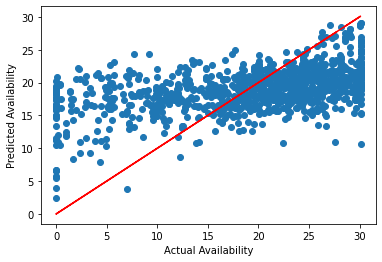

In [9]:
# RANDOM FOREST #
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
rf.fit(X_train,y_train)
p2 = rf.predict(X_test)

# PREDICTIONS
plt.scatter(y_test,p2)
plt.plot(y_test,y_test,"r")
plt.xlabel('Actual Availability')
plt.ylabel('Predicted Availability')

# EVALUATE THE MODEL RFR1
print("MSE:",metrics.mean_squared_error (y_test,p2))
print("RMSE:", np.sqrt(metrics.mean_squared_error (y_test,p2)))
print("RRMSE:",np.sqrt(metrics.mean_squared_error (y_test,p2))/y_test.mean())
print("MAE:", metrics.mean_absolute_error (y_test, p2))
print("RMAE:", metrics.mean_absolute_error (y_test, p2)/y_test.mean())
print("EV:", metrics.explained_variance_score(y_test,p2))
print("R2:", metrics.r2_score(y_test,p2))

Epoch 1/1000
95/95 [==============================] - 1s 7ms/step - loss: 287.1028 - val_loss: 117.3013
Epoch 2/1000
95/95 [==============================] - 0s 2ms/step - loss: 93.6680 - val_loss: 86.2340
Epoch 3/1000
95/95 [==============================] - 0s 4ms/step - loss: 79.8337 - val_loss: 78.6420
Epoch 4/1000
95/95 [==============================] - 0s 4ms/step - loss: 76.0968 - val_loss: 76.5173
Epoch 5/1000
95/95 [==============================] - 0s 4ms/step - loss: 72.7084 - val_loss: 74.8723
Epoch 6/1000
95/95 [==============================] - 0s 5ms/step - loss: 72.3122 - val_loss: 73.1300
Epoch 7/1000
95/95 [==============================] - 0s 5ms/step - loss: 70.9816 - val_loss: 72.7542
Epoch 8/1000
95/95 [==============================] - 0s 4ms/step - loss: 69.3666 - val_loss: 71.5172
Epoch 9/1000
95/95 [==============================] - 0s 5ms/step - loss: 68.3699 - val_loss: 71.6564
Epoch 10/1000
95/95 [==============================] - 0s 4ms/step - loss: 68.81

<AxesSubplot:>

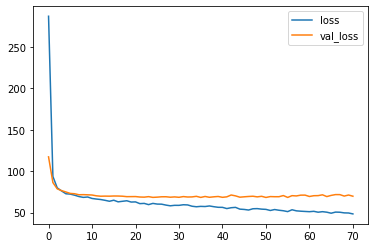

In [10]:
# DEEP LEARNING #
# Creating Model: dm1
dm1 = Sequential()
dm1.add(Dense(50,activation = 'relu'))
dm1.add(Dropout(.10))
dm1.add(Dense(25,activation = 'relu'))
dm1.add(Dropout(.10))
dm1.add(Dense(1, activation = 'linear'))

dm1.compile(optimizer = 'adam', loss = 'mse', )
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20,
        restore_best_weights=True)
# Training DM1
dm1.fit(x = X_train, y = y_train, epochs = 1000,validation_data = (X_test,y_test), callbacks = [early_stop], batch_size = 32)
# MODEL OVERFIT? DM1
pd.DataFrame(dm1.history.history).plot()

32/32 [==============================] - 0s 2ms/step
MSE: 68.28396216018594
RMSE: 8.26341104872473
RRMSE: 0.43085958933759333
MAE: 6.566454279885364
RMAE: 0.3423791673623831
EV: 0.06894819450894385
R2: 0.06872185549541077


Text(0, 0.5, 'Predicted Rate')

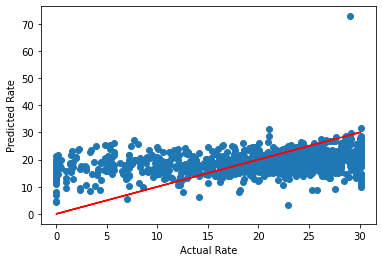

In [11]:
# MODEL EVALUATION DM1
pdm1 = dm1.predict(X_test)

print("MSE:",metrics.mean_squared_error (y_test,pdm1))
print("RMSE:", np.sqrt(metrics.mean_squared_error (y_test,pdm1)))
print("RRMSE:",np.sqrt(metrics.mean_squared_error (y_test,pdm1))/y_test.mean())
print("MAE:", metrics.mean_absolute_error (y_test, pdm1))
print("RMAE:", metrics.mean_absolute_error (y_test, pdm1)/y_test.mean())
print("EV:", metrics.explained_variance_score(y_test,pdm1))
print("R2:", metrics.r2_score(y_test,pdm1))

# PLOT THE PREDICTIONS DM1
plt.scatter(y_test,pdm1)
plt.plot(y_test,y_test,"r")
plt.xlabel('Actual Rate')
plt.ylabel('Predicted Rate')

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

# LSTM
model0 = Sequential()
model0.add(Dense(50,activation = 'relu'))
model0.add(Dropout(.10))
model0.add(Dense(25,activation = 'relu'))
model0.add(Dropout(.10))
model0.add(Dense(1, activation = 'linear'))

cp0 = ModelCheckpoint('model1/', save_best_only = True)
model0.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate=.0001), metrics = [RootMeanSquaredError()])
history = model0.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 1000, callbacks =[cp0])

Epoch 1/1000
95/95 [==============================] - 2s 15ms/step - loss: 445.2580 - root_mean_squared_error: 21.1011 - val_loss: 425.1480 - val_root_mean_squared_error: 20.6191
Epoch 2/1000
95/95 [==============================] - 1s 14ms/step - loss: 424.1870 - root_mean_squared_error: 20.5958 - val_loss: 403.2091 - val_root_mean_squared_error: 20.0801
Epoch 3/1000
95/95 [==============================] - 1s 11ms/step - loss: 400.7715 - root_mean_squared_error: 20.0193 - val_loss: 378.1063 - val_root_mean_squared_error: 19.4450
Epoch 4/1000
95/95 [==============================] - 1s 14ms/step - loss: 372.9397 - root_mean_squared_error: 19.3116 - val_loss: 348.7789 - val_root_mean_squared_error: 18.6756
Epoch 5/1000
95/95 [==============================] - 1s 11ms/step - loss: 341.5256 - root_mean_squared_error: 18.4804 - val_loss: 315.0898 - val_root_mean_squared_error: 17.7508
Epoch 6/1000
95/95 [==============================] - 1s 16ms/step - loss: 305.3174 - root_mean_squared_e

95/95 [==============================] - 1s 9ms/step - loss: 78.4706 - root_mean_squared_error: 8.8584 - val_loss: 85.1506 - val_root_mean_squared_error: 9.2277
Epoch 27/1000
95/95 [==============================] - 1s 13ms/step - loss: 78.3088 - root_mean_squared_error: 8.8492 - val_loss: 84.3644 - val_root_mean_squared_error: 9.1850
Epoch 28/1000
95/95 [==============================] - 1s 11ms/step - loss: 76.6825 - root_mean_squared_error: 8.7569 - val_loss: 83.7051 - val_root_mean_squared_error: 9.1490
Epoch 29/1000
95/95 [==============================] - 1s 10ms/step - loss: 76.3653 - root_mean_squared_error: 8.7387 - val_loss: 82.8633 - val_root_mean_squared_error: 9.1029
Epoch 30/1000
95/95 [==============================] - 1s 11ms/step - loss: 76.1079 - root_mean_squared_error: 8.7240 - val_loss: 82.2765 - val_root_mean_squared_error: 9.0706
Epoch 31/1000
95/95 [==============================] - 1s 11ms/step - loss: 75.4681 - root_mean_squared_error: 8.6872 - val_loss: 81.71

95/95 [==============================] - 1s 15ms/step - loss: 70.2761 - root_mean_squared_error: 8.3831 - val_loss: 75.6149 - val_root_mean_squared_error: 8.6957
Epoch 52/1000
95/95 [==============================] - 1s 12ms/step - loss: 70.3666 - root_mean_squared_error: 8.3885 - val_loss: 75.3957 - val_root_mean_squared_error: 8.6831
Epoch 53/1000
95/95 [==============================] - 1s 14ms/step - loss: 70.9188 - root_mean_squared_error: 8.4213 - val_loss: 75.1990 - val_root_mean_squared_error: 8.6717
Epoch 54/1000
95/95 [==============================] - 1s 12ms/step - loss: 70.1783 - root_mean_squared_error: 8.3772 - val_loss: 75.1017 - val_root_mean_squared_error: 8.6661
Epoch 55/1000
95/95 [==============================] - 1s 12ms/step - loss: 71.1328 - root_mean_squared_error: 8.4340 - val_loss: 74.8538 - val_root_mean_squared_error: 8.6518
Epoch 56/1000
95/95 [==============================] - 1s 14ms/step - loss: 69.2422 - root_mean_squared_error: 8.3212 - val_loss: 74.7

Epoch 77/1000
95/95 [==============================] - 1s 12ms/step - loss: 67.5443 - root_mean_squared_error: 8.2185 - val_loss: 72.6550 - val_root_mean_squared_error: 8.5238
Epoch 78/1000
95/95 [==============================] - 1s 15ms/step - loss: 67.7081 - root_mean_squared_error: 8.2285 - val_loss: 72.6283 - val_root_mean_squared_error: 8.5222
Epoch 79/1000
95/95 [==============================] - 1s 14ms/step - loss: 67.0434 - root_mean_squared_error: 8.1880 - val_loss: 72.4203 - val_root_mean_squared_error: 8.5100
Epoch 80/1000
95/95 [==============================] - 1s 13ms/step - loss: 67.4136 - root_mean_squared_error: 8.2106 - val_loss: 72.3444 - val_root_mean_squared_error: 8.5055
Epoch 81/1000
95/95 [==============================] - 1s 11ms/step - loss: 66.6272 - root_mean_squared_error: 8.1625 - val_loss: 72.2965 - val_root_mean_squared_error: 8.5027
Epoch 82/1000
95/95 [==============================] - 0s 3ms/step - loss: 67.5128 - root_mean_squared_error: 8.2166 - v

Epoch 107/1000
95/95 [==============================] - 1s 13ms/step - loss: 64.8155 - root_mean_squared_error: 8.0508 - val_loss: 71.0994 - val_root_mean_squared_error: 8.4320
Epoch 108/1000
95/95 [==============================] - 0s 5ms/step - loss: 65.8303 - root_mean_squared_error: 8.1136 - val_loss: 71.1031 - val_root_mean_squared_error: 8.4323
Epoch 109/1000
95/95 [==============================] - 1s 15ms/step - loss: 64.3641 - root_mean_squared_error: 8.0227 - val_loss: 70.9996 - val_root_mean_squared_error: 8.4261
Epoch 110/1000
95/95 [==============================] - 1s 10ms/step - loss: 65.1645 - root_mean_squared_error: 8.0725 - val_loss: 70.9594 - val_root_mean_squared_error: 8.4237
Epoch 111/1000
95/95 [==============================] - 0s 4ms/step - loss: 64.4947 - root_mean_squared_error: 8.0309 - val_loss: 71.0311 - val_root_mean_squared_error: 8.4280
Epoch 112/1000
95/95 [==============================] - 0s 2ms/step - loss: 64.0468 - root_mean_squared_error: 8.0029

Epoch 142/1000
95/95 [==============================] - 0s 2ms/step - loss: 62.7897 - root_mean_squared_error: 7.9240 - val_loss: 70.4428 - val_root_mean_squared_error: 8.3930
Epoch 143/1000
95/95 [==============================] - 0s 2ms/step - loss: 62.5299 - root_mean_squared_error: 7.9076 - val_loss: 70.4482 - val_root_mean_squared_error: 8.3933
Epoch 144/1000
95/95 [==============================] - 0s 2ms/step - loss: 61.6406 - root_mean_squared_error: 7.8512 - val_loss: 70.4737 - val_root_mean_squared_error: 8.3949
Epoch 145/1000
95/95 [==============================] - 1s 9ms/step - loss: 62.5880 - root_mean_squared_error: 7.9113 - val_loss: 70.3992 - val_root_mean_squared_error: 8.3904
Epoch 146/1000
95/95 [==============================] - 1s 10ms/step - loss: 62.9338 - root_mean_squared_error: 7.9331 - val_loss: 70.2785 - val_root_mean_squared_error: 8.3832
Epoch 147/1000
95/95 [==============================] - 1s 10ms/step - loss: 64.0776 - root_mean_squared_error: 8.0049 

Epoch 176/1000
95/95 [==============================] - 1s 14ms/step - loss: 60.9261 - root_mean_squared_error: 7.8055 - val_loss: 69.5621 - val_root_mean_squared_error: 8.3404
Epoch 177/1000
95/95 [==============================] - 1s 10ms/step - loss: 60.5796 - root_mean_squared_error: 7.7833 - val_loss: 69.5421 - val_root_mean_squared_error: 8.3392
Epoch 178/1000
95/95 [==============================] - 0s 2ms/step - loss: 62.2813 - root_mean_squared_error: 7.8918 - val_loss: 69.5856 - val_root_mean_squared_error: 8.3418
Epoch 179/1000
95/95 [==============================] - 1s 11ms/step - loss: 60.7952 - root_mean_squared_error: 7.7971 - val_loss: 69.5276 - val_root_mean_squared_error: 8.3383
Epoch 180/1000
95/95 [==============================] - 0s 4ms/step - loss: 63.1792 - root_mean_squared_error: 7.9485 - val_loss: 69.5286 - val_root_mean_squared_error: 8.3384
Epoch 181/1000
95/95 [==============================] - 1s 13ms/step - loss: 61.3972 - root_mean_squared_error: 7.835

Epoch 216/1000
95/95 [==============================] - 0s 2ms/step - loss: 60.1476 - root_mean_squared_error: 7.7555 - val_loss: 69.4713 - val_root_mean_squared_error: 8.3349
Epoch 217/1000
95/95 [==============================] - 0s 2ms/step - loss: 59.3669 - root_mean_squared_error: 7.7050 - val_loss: 69.3880 - val_root_mean_squared_error: 8.3299
Epoch 218/1000
95/95 [==============================] - 0s 3ms/step - loss: 60.6849 - root_mean_squared_error: 7.7901 - val_loss: 69.3533 - val_root_mean_squared_error: 8.3279
Epoch 219/1000
95/95 [==============================] - 1s 9ms/step - loss: 60.0820 - root_mean_squared_error: 7.7513 - val_loss: 69.3134 - val_root_mean_squared_error: 8.3255
Epoch 220/1000
95/95 [==============================] - 1s 10ms/step - loss: 60.0459 - root_mean_squared_error: 7.7489 - val_loss: 69.2837 - val_root_mean_squared_error: 8.3237
Epoch 221/1000
95/95 [==============================] - 1s 9ms/step - loss: 59.4000 - root_mean_squared_error: 7.7071 -

95/95 [==============================] - 0s 4ms/step - loss: 59.1464 - root_mean_squared_error: 7.6907 - val_loss: 69.1843 - val_root_mean_squared_error: 8.3177
Epoch 255/1000
95/95 [==============================] - 0s 3ms/step - loss: 58.5981 - root_mean_squared_error: 7.6549 - val_loss: 69.1579 - val_root_mean_squared_error: 8.3161
Epoch 256/1000
95/95 [==============================] - 2s 23ms/step - loss: 59.1932 - root_mean_squared_error: 7.6937 - val_loss: 68.9351 - val_root_mean_squared_error: 8.3027
Epoch 257/1000
95/95 [==============================] - 1s 13ms/step - loss: 58.5898 - root_mean_squared_error: 7.6544 - val_loss: 68.9116 - val_root_mean_squared_error: 8.3013
Epoch 258/1000
95/95 [==============================] - 0s 3ms/step - loss: 58.7099 - root_mean_squared_error: 7.6622 - val_loss: 69.0013 - val_root_mean_squared_error: 8.3067
Epoch 259/1000
95/95 [==============================] - 0s 3ms/step - loss: 59.0081 - root_mean_squared_error: 7.6817 - val_loss: 69.

95/95 [==============================] - 0s 5ms/step - loss: 57.0092 - root_mean_squared_error: 7.5504 - val_loss: 68.9436 - val_root_mean_squared_error: 8.3032
Epoch 299/1000
95/95 [==============================] - 0s 3ms/step - loss: 56.3483 - root_mean_squared_error: 7.5065 - val_loss: 68.9533 - val_root_mean_squared_error: 8.3038
Epoch 300/1000
95/95 [==============================] - 0s 2ms/step - loss: 57.1144 - root_mean_squared_error: 7.5574 - val_loss: 69.0446 - val_root_mean_squared_error: 8.3093
Epoch 301/1000
95/95 [==============================] - 0s 2ms/step - loss: 58.1432 - root_mean_squared_error: 7.6252 - val_loss: 69.1109 - val_root_mean_squared_error: 8.3133
Epoch 302/1000
95/95 [==============================] - 0s 2ms/step - loss: 57.1848 - root_mean_squared_error: 7.5621 - val_loss: 69.1553 - val_root_mean_squared_error: 8.3160
Epoch 303/1000
95/95 [==============================] - 0s 3ms/step - loss: 58.1203 - root_mean_squared_error: 7.6237 - val_loss: 69.11

95/95 [==============================] - 0s 2ms/step - loss: 56.8442 - root_mean_squared_error: 7.5395 - val_loss: 69.1523 - val_root_mean_squared_error: 8.3158
Epoch 345/1000
95/95 [==============================] - 0s 2ms/step - loss: 56.1472 - root_mean_squared_error: 7.4931 - val_loss: 69.2180 - val_root_mean_squared_error: 8.3197
Epoch 346/1000
95/95 [==============================] - 0s 2ms/step - loss: 56.6024 - root_mean_squared_error: 7.5235 - val_loss: 69.1579 - val_root_mean_squared_error: 8.3161
Epoch 347/1000
95/95 [==============================] - 0s 2ms/step - loss: 55.9266 - root_mean_squared_error: 7.4784 - val_loss: 69.1865 - val_root_mean_squared_error: 8.3178
Epoch 348/1000
95/95 [==============================] - 0s 2ms/step - loss: 55.7082 - root_mean_squared_error: 7.4638 - val_loss: 69.2031 - val_root_mean_squared_error: 8.3188
Epoch 349/1000
95/95 [==============================] - 0s 5ms/step - loss: 56.2166 - root_mean_squared_error: 7.4978 - val_loss: 69.23

Epoch 389/1000
95/95 [==============================] - 2s 18ms/step - loss: 55.6719 - root_mean_squared_error: 7.4614 - val_loss: 68.5381 - val_root_mean_squared_error: 8.2788
Epoch 390/1000
95/95 [==============================] - 0s 5ms/step - loss: 54.5940 - root_mean_squared_error: 7.3888 - val_loss: 68.5723 - val_root_mean_squared_error: 8.2808
Epoch 391/1000
95/95 [==============================] - 0s 3ms/step - loss: 54.0377 - root_mean_squared_error: 7.3510 - val_loss: 68.6621 - val_root_mean_squared_error: 8.2863
Epoch 392/1000
95/95 [==============================] - 0s 3ms/step - loss: 54.3627 - root_mean_squared_error: 7.3731 - val_loss: 68.7182 - val_root_mean_squared_error: 8.2896
Epoch 393/1000
95/95 [==============================] - 0s 2ms/step - loss: 53.0382 - root_mean_squared_error: 7.2827 - val_loss: 68.7276 - val_root_mean_squared_error: 8.2902
Epoch 394/1000
95/95 [==============================] - 0s 2ms/step - loss: 55.8812 - root_mean_squared_error: 7.4754 -

Epoch 435/1000
95/95 [==============================] - 0s 3ms/step - loss: 53.9008 - root_mean_squared_error: 7.3417 - val_loss: 68.8293 - val_root_mean_squared_error: 8.2963
Epoch 436/1000
95/95 [==============================] - 0s 2ms/step - loss: 53.3569 - root_mean_squared_error: 7.3046 - val_loss: 68.9058 - val_root_mean_squared_error: 8.3009
Epoch 437/1000
95/95 [==============================] - 0s 2ms/step - loss: 53.9999 - root_mean_squared_error: 7.3485 - val_loss: 68.9178 - val_root_mean_squared_error: 8.3017
Epoch 438/1000
95/95 [==============================] - 0s 4ms/step - loss: 53.5295 - root_mean_squared_error: 7.3164 - val_loss: 68.8199 - val_root_mean_squared_error: 8.2958
Epoch 439/1000
95/95 [==============================] - 0s 2ms/step - loss: 52.6138 - root_mean_squared_error: 7.2535 - val_loss: 68.9287 - val_root_mean_squared_error: 8.3023
Epoch 440/1000
95/95 [==============================] - 0s 2ms/step - loss: 53.5317 - root_mean_squared_error: 7.3165 - 

Epoch 480/1000
95/95 [==============================] - 0s 4ms/step - loss: 51.8461 - root_mean_squared_error: 7.2004 - val_loss: 68.5266 - val_root_mean_squared_error: 8.2781
Epoch 481/1000
95/95 [==============================] - 0s 3ms/step - loss: 51.8783 - root_mean_squared_error: 7.2027 - val_loss: 68.7067 - val_root_mean_squared_error: 8.2890
Epoch 482/1000
95/95 [==============================] - 0s 5ms/step - loss: 52.0987 - root_mean_squared_error: 7.2179 - val_loss: 68.5404 - val_root_mean_squared_error: 8.2789
Epoch 483/1000
95/95 [==============================] - 0s 2ms/step - loss: 53.0156 - root_mean_squared_error: 7.2812 - val_loss: 68.3860 - val_root_mean_squared_error: 8.2696
Epoch 484/1000
95/95 [==============================] - 0s 2ms/step - loss: 53.0256 - root_mean_squared_error: 7.2819 - val_loss: 68.5672 - val_root_mean_squared_error: 8.2805
Epoch 485/1000
95/95 [==============================] - 0s 2ms/step - loss: 51.5431 - root_mean_squared_error: 7.1794 - 

Epoch 525/1000
95/95 [==============================] - 0s 5ms/step - loss: 51.4577 - root_mean_squared_error: 7.1734 - val_loss: 68.5255 - val_root_mean_squared_error: 8.2780
Epoch 526/1000
95/95 [==============================] - 0s 4ms/step - loss: 51.5467 - root_mean_squared_error: 7.1796 - val_loss: 68.5643 - val_root_mean_squared_error: 8.2804
Epoch 527/1000
95/95 [==============================] - 0s 4ms/step - loss: 51.4126 - root_mean_squared_error: 7.1703 - val_loss: 68.4920 - val_root_mean_squared_error: 8.2760
Epoch 528/1000
95/95 [==============================] - 0s 4ms/step - loss: 51.8209 - root_mean_squared_error: 7.1987 - val_loss: 68.5320 - val_root_mean_squared_error: 8.2784
Epoch 529/1000
95/95 [==============================] - 0s 4ms/step - loss: 50.8655 - root_mean_squared_error: 7.1320 - val_loss: 68.7285 - val_root_mean_squared_error: 8.2903
Epoch 530/1000
95/95 [==============================] - 0s 3ms/step - loss: 51.6275 - root_mean_squared_error: 7.1852 - 

Epoch 570/1000
95/95 [==============================] - 0s 2ms/step - loss: 50.5976 - root_mean_squared_error: 7.1132 - val_loss: 68.6264 - val_root_mean_squared_error: 8.2841
Epoch 571/1000
95/95 [==============================] - 0s 2ms/step - loss: 49.9929 - root_mean_squared_error: 7.0706 - val_loss: 68.4570 - val_root_mean_squared_error: 8.2739
Epoch 572/1000
95/95 [==============================] - 0s 2ms/step - loss: 49.6353 - root_mean_squared_error: 7.0452 - val_loss: 68.5000 - val_root_mean_squared_error: 8.2765
Epoch 573/1000
95/95 [==============================] - 0s 2ms/step - loss: 51.1620 - root_mean_squared_error: 7.1528 - val_loss: 68.5342 - val_root_mean_squared_error: 8.2785
Epoch 574/1000
95/95 [==============================] - 0s 2ms/step - loss: 51.1045 - root_mean_squared_error: 7.1487 - val_loss: 68.4525 - val_root_mean_squared_error: 8.2736
Epoch 575/1000
95/95 [==============================] - 0s 3ms/step - loss: 51.7885 - root_mean_squared_error: 7.1964 - 

95/95 [==============================] - 1s 6ms/step - loss: 50.4072 - root_mean_squared_error: 7.0998 - val_loss: 68.4849 - val_root_mean_squared_error: 8.2756
Epoch 614/1000
95/95 [==============================] - 0s 4ms/step - loss: 49.7556 - root_mean_squared_error: 7.0538 - val_loss: 68.4039 - val_root_mean_squared_error: 8.2707
Epoch 615/1000
95/95 [==============================] - 1s 6ms/step - loss: 50.0552 - root_mean_squared_error: 7.0750 - val_loss: 68.2803 - val_root_mean_squared_error: 8.2632
Epoch 616/1000
95/95 [==============================] - 0s 5ms/step - loss: 49.2225 - root_mean_squared_error: 7.0159 - val_loss: 68.4018 - val_root_mean_squared_error: 8.2705
Epoch 617/1000
95/95 [==============================] - 0s 4ms/step - loss: 49.5141 - root_mean_squared_error: 7.0366 - val_loss: 68.3397 - val_root_mean_squared_error: 8.2668
Epoch 618/1000
95/95 [==============================] - 0s 5ms/step - loss: 49.8097 - root_mean_squared_error: 7.0576 - val_loss: 68.29

95/95 [==============================] - 0s 2ms/step - loss: 47.6216 - root_mean_squared_error: 6.9008 - val_loss: 68.6395 - val_root_mean_squared_error: 8.2849
Epoch 660/1000
95/95 [==============================] - 0s 2ms/step - loss: 49.4267 - root_mean_squared_error: 7.0304 - val_loss: 68.8395 - val_root_mean_squared_error: 8.2970
Epoch 661/1000
95/95 [==============================] - 0s 2ms/step - loss: 48.3562 - root_mean_squared_error: 6.9539 - val_loss: 68.8399 - val_root_mean_squared_error: 8.2970
Epoch 662/1000
95/95 [==============================] - 0s 2ms/step - loss: 48.2644 - root_mean_squared_error: 6.9473 - val_loss: 68.7976 - val_root_mean_squared_error: 8.2944
Epoch 663/1000
95/95 [==============================] - 0s 2ms/step - loss: 49.7341 - root_mean_squared_error: 7.0522 - val_loss: 68.6411 - val_root_mean_squared_error: 8.2850
Epoch 664/1000
95/95 [==============================] - 0s 3ms/step - loss: 49.4583 - root_mean_squared_error: 7.0327 - val_loss: 68.68

95/95 [==============================] - 0s 3ms/step - loss: 47.9231 - root_mean_squared_error: 6.9226 - val_loss: 68.6858 - val_root_mean_squared_error: 8.2877
Epoch 706/1000
95/95 [==============================] - 0s 2ms/step - loss: 46.9552 - root_mean_squared_error: 6.8524 - val_loss: 68.7207 - val_root_mean_squared_error: 8.2898
Epoch 707/1000
95/95 [==============================] - 0s 2ms/step - loss: 48.6679 - root_mean_squared_error: 6.9762 - val_loss: 68.6445 - val_root_mean_squared_error: 8.2852
Epoch 708/1000
95/95 [==============================] - 0s 2ms/step - loss: 47.4066 - root_mean_squared_error: 6.8852 - val_loss: 68.7168 - val_root_mean_squared_error: 8.2896
Epoch 709/1000
95/95 [==============================] - 0s 2ms/step - loss: 47.7263 - root_mean_squared_error: 6.9084 - val_loss: 68.7817 - val_root_mean_squared_error: 8.2935
Epoch 710/1000
95/95 [==============================] - 0s 5ms/step - loss: 48.6797 - root_mean_squared_error: 6.9771 - val_loss: 68.95

95/95 [==============================] - 0s 5ms/step - loss: 47.0751 - root_mean_squared_error: 6.8611 - val_loss: 68.6484 - val_root_mean_squared_error: 8.2854
Epoch 752/1000
95/95 [==============================] - 0s 5ms/step - loss: 47.0171 - root_mean_squared_error: 6.8569 - val_loss: 68.6112 - val_root_mean_squared_error: 8.2832
Epoch 753/1000
95/95 [==============================] - 0s 4ms/step - loss: 46.9154 - root_mean_squared_error: 6.8495 - val_loss: 68.5206 - val_root_mean_squared_error: 8.2777
Epoch 754/1000
95/95 [==============================] - 0s 3ms/step - loss: 47.0839 - root_mean_squared_error: 6.8618 - val_loss: 68.3457 - val_root_mean_squared_error: 8.2671
Epoch 755/1000
95/95 [==============================] - 1s 6ms/step - loss: 46.3490 - root_mean_squared_error: 6.8080 - val_loss: 68.3936 - val_root_mean_squared_error: 8.2700
Epoch 756/1000
95/95 [==============================] - 0s 3ms/step - loss: 46.5100 - root_mean_squared_error: 6.8198 - val_loss: 68.41

Epoch 797/1000
95/95 [==============================] - 0s 2ms/step - loss: 45.7145 - root_mean_squared_error: 6.7613 - val_loss: 68.4953 - val_root_mean_squared_error: 8.2762
Epoch 798/1000
95/95 [==============================] - 0s 2ms/step - loss: 47.3476 - root_mean_squared_error: 6.8810 - val_loss: 68.4079 - val_root_mean_squared_error: 8.2709
Epoch 799/1000
95/95 [==============================] - 0s 2ms/step - loss: 46.8598 - root_mean_squared_error: 6.8454 - val_loss: 68.4095 - val_root_mean_squared_error: 8.2710
Epoch 800/1000
95/95 [==============================] - 0s 2ms/step - loss: 47.1940 - root_mean_squared_error: 6.8698 - val_loss: 68.2809 - val_root_mean_squared_error: 8.2632
Epoch 801/1000
95/95 [==============================] - 0s 2ms/step - loss: 45.8306 - root_mean_squared_error: 6.7698 - val_loss: 68.3776 - val_root_mean_squared_error: 8.2691
Epoch 802/1000
95/95 [==============================] - 1s 5ms/step - loss: 45.8232 - root_mean_squared_error: 6.7693 - 

95/95 [==============================] - 0s 2ms/step - loss: 45.3189 - root_mean_squared_error: 6.7319 - val_loss: 68.8368 - val_root_mean_squared_error: 8.2968
Epoch 844/1000
95/95 [==============================] - 0s 2ms/step - loss: 46.5563 - root_mean_squared_error: 6.8232 - val_loss: 69.0320 - val_root_mean_squared_error: 8.3086
Epoch 845/1000
95/95 [==============================] - 0s 3ms/step - loss: 45.4539 - root_mean_squared_error: 6.7420 - val_loss: 68.9333 - val_root_mean_squared_error: 8.3026
Epoch 846/1000
95/95 [==============================] - 0s 4ms/step - loss: 46.2351 - root_mean_squared_error: 6.7996 - val_loss: 68.7070 - val_root_mean_squared_error: 8.2890
Epoch 847/1000
95/95 [==============================] - 0s 3ms/step - loss: 45.1369 - root_mean_squared_error: 6.7184 - val_loss: 69.0217 - val_root_mean_squared_error: 8.3079
Epoch 848/1000
95/95 [==============================] - 0s 4ms/step - loss: 46.9518 - root_mean_squared_error: 6.8521 - val_loss: 68.91

95/95 [==============================] - 0s 3ms/step - loss: 43.7972 - root_mean_squared_error: 6.6179 - val_loss: 69.1538 - val_root_mean_squared_error: 8.3159
Epoch 890/1000
95/95 [==============================] - 0s 2ms/step - loss: 45.4221 - root_mean_squared_error: 6.7396 - val_loss: 68.9888 - val_root_mean_squared_error: 8.3060
Epoch 891/1000
95/95 [==============================] - 0s 2ms/step - loss: 45.3254 - root_mean_squared_error: 6.7324 - val_loss: 69.2222 - val_root_mean_squared_error: 8.3200
Epoch 892/1000
95/95 [==============================] - 0s 3ms/step - loss: 45.0228 - root_mean_squared_error: 6.7099 - val_loss: 69.1363 - val_root_mean_squared_error: 8.3148
Epoch 893/1000
95/95 [==============================] - 0s 3ms/step - loss: 45.9283 - root_mean_squared_error: 6.7770 - val_loss: 69.1895 - val_root_mean_squared_error: 8.3180
Epoch 894/1000
95/95 [==============================] - 0s 2ms/step - loss: 44.8701 - root_mean_squared_error: 6.6985 - val_loss: 69.28

95/95 [==============================] - 0s 4ms/step - loss: 45.6972 - root_mean_squared_error: 6.7600 - val_loss: 69.7272 - val_root_mean_squared_error: 8.3503
Epoch 936/1000
95/95 [==============================] - 0s 3ms/step - loss: 43.8280 - root_mean_squared_error: 6.6203 - val_loss: 69.6543 - val_root_mean_squared_error: 8.3459
Epoch 937/1000
95/95 [==============================] - 0s 3ms/step - loss: 44.2531 - root_mean_squared_error: 6.6523 - val_loss: 69.5833 - val_root_mean_squared_error: 8.3417
Epoch 938/1000
95/95 [==============================] - 1s 5ms/step - loss: 44.4612 - root_mean_squared_error: 6.6679 - val_loss: 69.4906 - val_root_mean_squared_error: 8.3361
Epoch 939/1000
95/95 [==============================] - 0s 4ms/step - loss: 44.3107 - root_mean_squared_error: 6.6566 - val_loss: 69.4498 - val_root_mean_squared_error: 8.3337
Epoch 940/1000
95/95 [==============================] - 0s 4ms/step - loss: 44.4930 - root_mean_squared_error: 6.6703 - val_loss: 69.31

95/95 [==============================] - 0s 2ms/step - loss: 42.9696 - root_mean_squared_error: 6.5551 - val_loss: 69.2581 - val_root_mean_squared_error: 8.3221
Epoch 982/1000
95/95 [==============================] - 0s 3ms/step - loss: 43.7100 - root_mean_squared_error: 6.6114 - val_loss: 69.3723 - val_root_mean_squared_error: 8.3290
Epoch 983/1000
95/95 [==============================] - 0s 2ms/step - loss: 43.3477 - root_mean_squared_error: 6.5839 - val_loss: 69.3664 - val_root_mean_squared_error: 8.3287
Epoch 984/1000
95/95 [==============================] - 0s 2ms/step - loss: 44.1049 - root_mean_squared_error: 6.6412 - val_loss: 69.5412 - val_root_mean_squared_error: 8.3391
Epoch 985/1000
95/95 [==============================] - 0s 2ms/step - loss: 43.3705 - root_mean_squared_error: 6.5856 - val_loss: 69.6532 - val_root_mean_squared_error: 8.3458
Epoch 986/1000
95/95 [==============================] - 0s 4ms/step - loss: 44.1300 - root_mean_squared_error: 6.6430 - val_loss: 69.20

32/32 [==============================] - 0s 926us/step


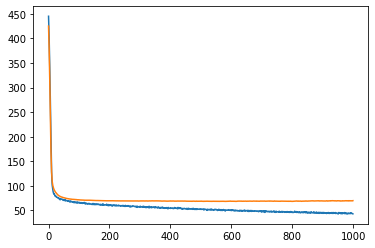

In [13]:
from tensorflow.keras.models import load_model
model0 = load_model('model1/')

test_predictions = model0.predict(X_test).flatten()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [14]:
# Evaluating 
print("MSE:",metrics.mean_squared_error (y_test,test_predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error (y_test,test_predictions)))
print("RRMSE:",np.sqrt(metrics.mean_squared_error (y_test,test_predictions))/y_test.mean())
print("MAE:", metrics.mean_absolute_error (y_test, test_predictions))
print("RMAE:", metrics.mean_absolute_error (y_test, test_predictions)/y_test.mean())
print("EV:", metrics.explained_variance_score(y_test,test_predictions))
print("R2:", metrics.r2_score(y_test,test_predictions))

MSE: 68.1405486587389
RMSE: 8.254728866458237
RRMSE: 0.430406894746481
MAE: 6.509791609446207
RMAE: 0.33942473912781596
EV: 0.07122399095908138
R2: 0.0706777739175316
